# **Understanding the Datasets**

---



In [ ]:
import pandas as pd
data_descriptions = pd.read_csv('/content/data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


In [ ]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# **Data Analysis**

---



# **1-Load the Data and Data Collection**

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [ ]:
train_df = pd.read_csv("/content/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
test_df = pd.read_csv("/content/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


In [ ]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Explore, Clean, Validate, and Visualize the Data


---


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          109435 non-null  object 
 1   Age             109435 non-null  int64  
 2   Income          109435 non-null  int64  
 3   LoanAmount      109435 non-null  int64  
 4   CreditScore     109435 non-null  int64  
 5   MonthsEmployed  109435 non-null  int64  
 6   NumCreditLines  109435 non-null  int64  
 7   InterestRate    109435 non-null  float64
 8   LoanTerm        109435 non-null  int64  
 9   DTIRatio        109435 non-null  float64
 10  Education       109435 non-null  object 
 11  EmploymentType  109435 non-null  object 
 12  MaritalStatus   109435 non-null  object 
 13  HasMortgage     109435 non-null  object 
 14  HasDependents   109435 non-null  object 
 15  LoanPurpose     109435 non-null  object 
 16  HasCoSigner     109435 non-null  object 
dtypes: float64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

here notice that datatypes are object, float, integer. Also no missiong values, all rows numbers are same

In [ ]:

test_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000
mean,43.536483,82487.391036,127486.538667,574.665948,59.576315,2.501037,13.496206,36.086298,0.500263
std,15.015927,38966.033421,70703.100952,158.800306,34.548087,1.118149,6.647329,16.928304,0.231246
min,18.000000,15003.000000,5002.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48745.000000,66173.500000,437.000000,30.000000,2.000000,7.750000,24.000000,0.300000
50%,44.000000,82545.000000,127345.000000,575.000000,60.000000,3.000000,13.500000,36.000000,0.500000
75%,57.000000,116184.000000,188674.000000,712.000000,89.000000,4.000000,19.270000,48.000000,0.700000
max,69.000000,149999.000000,249995.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


In [ ]:

train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
train_df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
train_df.isna().sum() / len(train_df)


,0
LoanID,0.0
Age,0.0
Income,0.0
LoanAmount,0.0
CreditScore,0.0
MonthsEmployed,0.0
NumCreditLines,0.0
InterestRate,0.0
LoanTerm,0.0
DTIRatio,0.0


In [ ]:
test_df.isna().sum() / len(test_df)


,0
LoanID,0.0
Age,0.0
Income,0.0
LoanAmount,0.0
CreditScore,0.0
MonthsEmployed,0.0
NumCreditLines,0.0
InterestRate,0.0
LoanTerm,0.0
DTIRatio,0.0


to confirm no missing values percentage

In [ ]:
# Show missing values
print(df.isnull().sum())



LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


No missing values

**1.1.2 detecting outliers**

IQR method

In [ ]:
# Check and report number of outliers per column using IQR
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers)

# Print number of outliers in each column
for col in ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']:
    count = count_outliers_iqr(df, col)
    print(f"{col}: {count} outliers")


Age: 0 outliers
Income: 0 outliers
LoanAmount: 0 outliers
CreditScore: 0 outliers
MonthsEmployed: 0 outliers
NumCreditLines: 0 outliers
InterestRate: 0 outliers
LoanTerm: 0 outliers
DTIRatio: 0 outliers


In [ ]:
# Use IQR method for numerical columns
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply for selected numeric columns
for col in ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']:
    df = remove_outliers_iqr(df, col)


Boxplot method

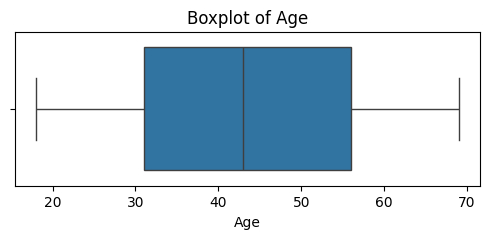

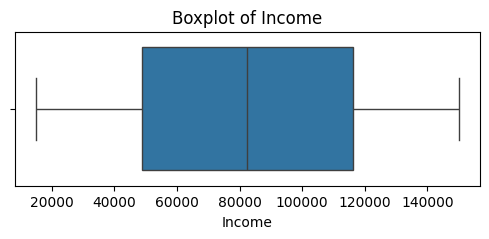

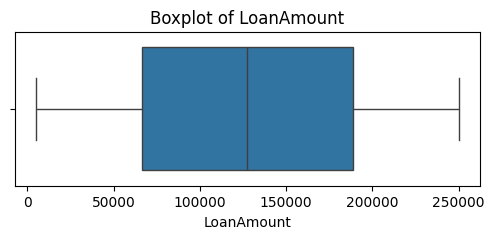

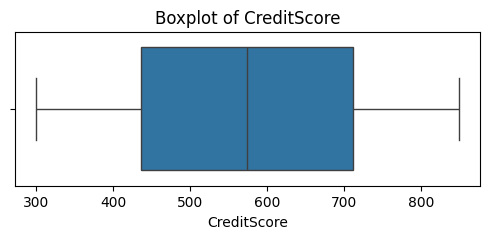

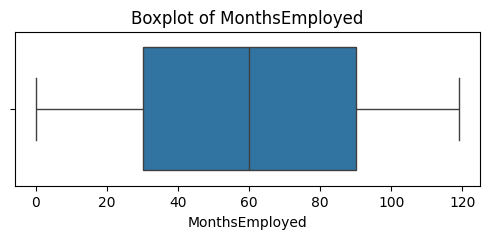

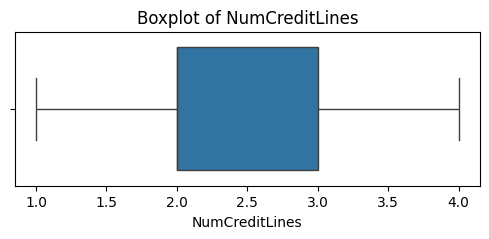

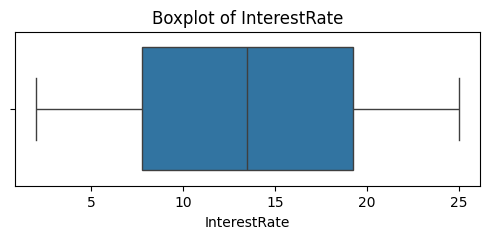

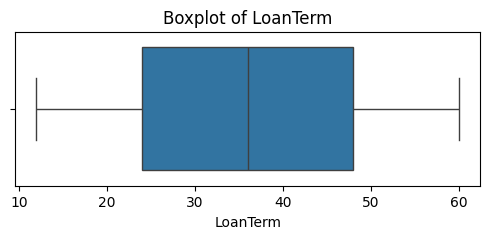

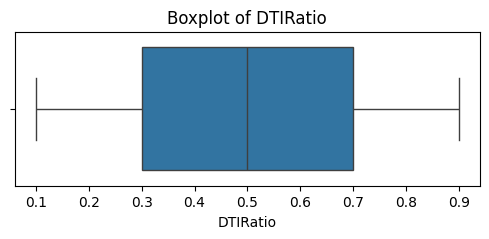

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check outliers for each numerical column
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('Default')

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Z-score method

In [ ]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = train_df[numerical_cols].apply(zscore)
outliers_z = (abs(z_scores) > 3).sum()
print("Outlier count per column (Z > 3):\n", outliers_z)


Outlier count per column (Z > 3):
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
dtype: int64


**1.1.2 detecting outliers**

IQR method

In [ ]:
# Check and report number of outliers per column using IQR
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers)

# Print number of outliers in each column
for col in ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']:
    count = count_outliers_iqr(df, col)
    print(f"{col}: {count} outliers")


Age: 0 outliers
Income: 0 outliers
LoanAmount: 0 outliers
CreditScore: 0 outliers
MonthsEmployed: 0 outliers
NumCreditLines: 0 outliers
InterestRate: 0 outliers
LoanTerm: 0 outliers
DTIRatio: 0 outliers


In [ ]:
# Use IQR method for numerical columns
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply for selected numeric columns
for col in ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']:
    df = remove_outliers_iqr(df, col)


Boxplot method

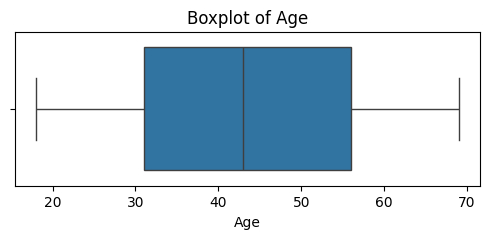

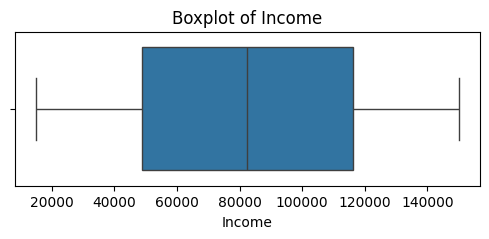

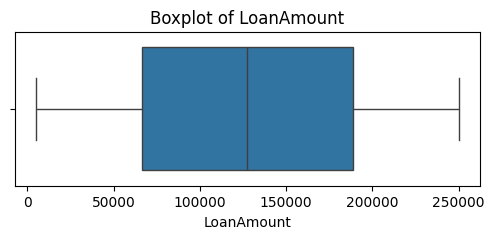

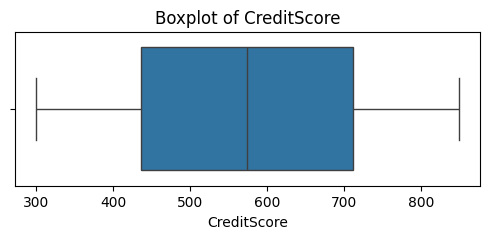

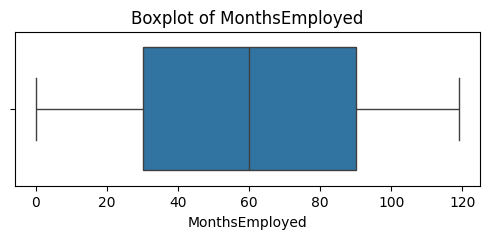

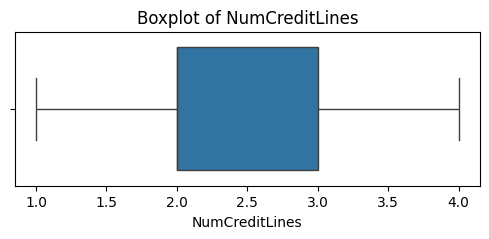

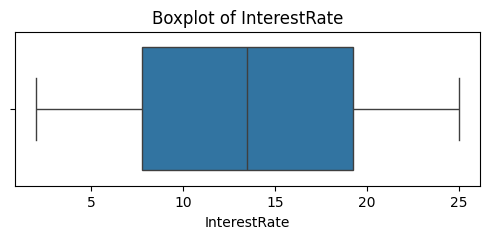

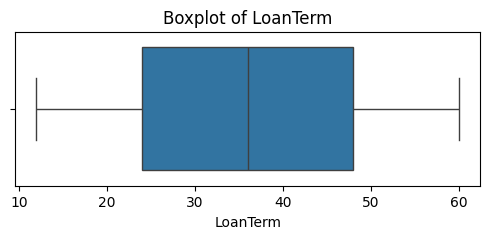

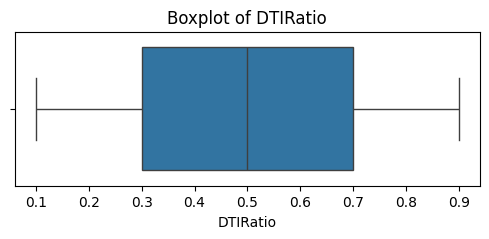

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check outliers for each numerical column
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('Default')

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Z-score method

In [ ]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = train_df[numerical_cols].apply(zscore)
outliers_z = (abs(z_scores) > 3).sum()
print("Outlier count per column (Z > 3):\n", outliers_z)


Outlier count per column (Z > 3):
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
dtype: int64


Boxplpt of indivisual numerical columns

<Axes: ylabel='LoanAmount'>

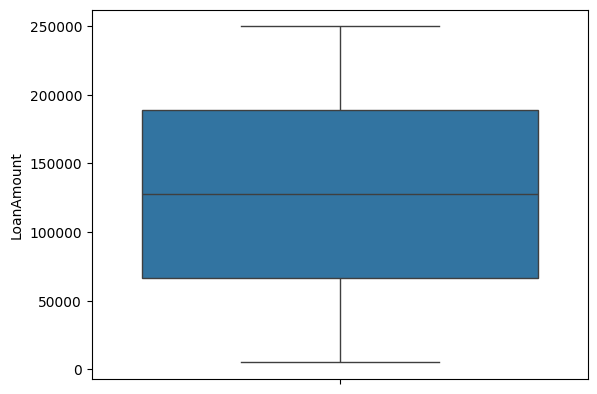

In [ ]:
sns.boxplot(train_df['LoanAmount'])


<Axes: ylabel='Age'>

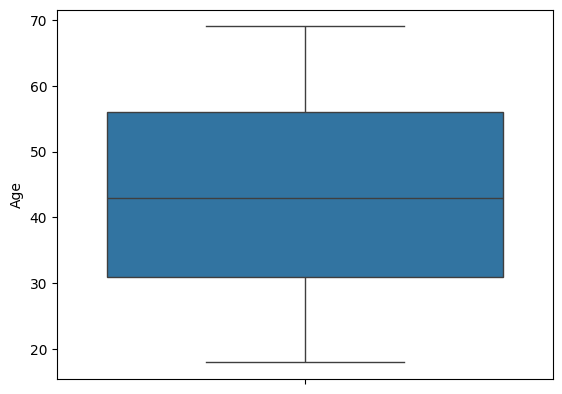

In [ ]:
sns.boxplot(train_df['Age'])


statistical description of columns

In [ ]:
train_df['Age'].describe()

,Age
count,255347.000000
mean,43.498306
std,14.990258
min,18.000000
25%,31.000000
50%,43.000000
75%,56.000000
max,69.000000


this seems decent as the the min legal age is 18 and 69 seems reasonable as max age to have a loan.

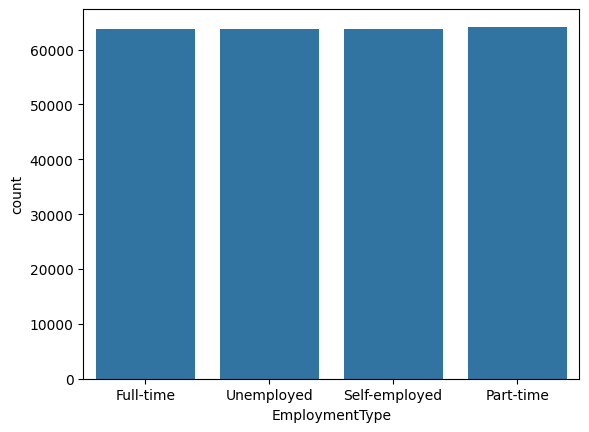

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='EmploymentType', data=train_df, )
plt.show()


In [ ]:
train_df.duplicated().sum()

np.int64(0)

Perfect , no duplicates!

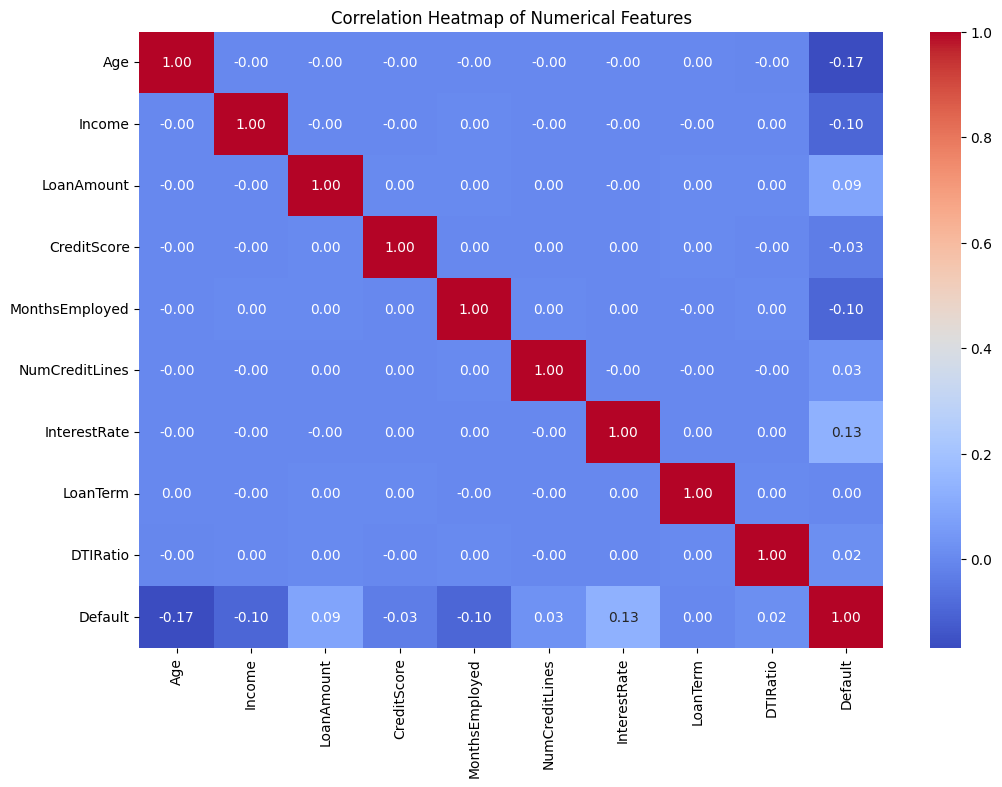

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_data = train_df.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **Training the Model**
1-Decison Tree
2-KNN


---



1-Decision Tree

1-Decision Tree

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


train_df = pd.read_csv("train.csv")


# Define numerical and categorical columns
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
categorical_cols = ['EmploymentType', 'MaritalStatus', 'Education',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Handle unknown categories
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])


# Split the data
X = train_df.drop(columns=['Default', 'LoanID'])  # Features
y = train_df['Default']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.87      0.89     45170
           1       0.20      0.23      0.21      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070



In [ ]:
training_accuracy = pipeline.score(X_train, y_train) * 100
testing_accuracy = pipeline.score(X_test, y_test) * 100
y_pred = pipeline.predict(X_test)
print("Training Accuracy: {:.2f}%".format(training_accuracy))
print("Testing Accuracy: {:.2f}%".format(testing_accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 100.00%
Testing Accuracy: 80.07%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89     45170
           1       0.20      0.23      0.21      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070



2-KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
# Split the data into features (X) and target (y)
X = train_df.drop(columns=['Default', 'LoanID'])
y = train_df['Default']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical features
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
training_accuracy = pipeline.score(X_train, y_train) * 100
testing_accuracy = pipeline.score(X_test, y_test) * 100
y_pred = pipeline.predict(X_test)

In [ ]:
print("Training Accuracy: {:.2f}%".format(training_accuracy))
print("Testing Accuracy: {:.2f}%".format(testing_accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 89.48%
Testing Accuracy: 87.54%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     45170
           1       0.33      0.07      0.12      5900

    accuracy                           0.88     51070
   macro avg       0.61      0.53      0.53     51070
weighted avg       0.82      0.88      0.84     51070



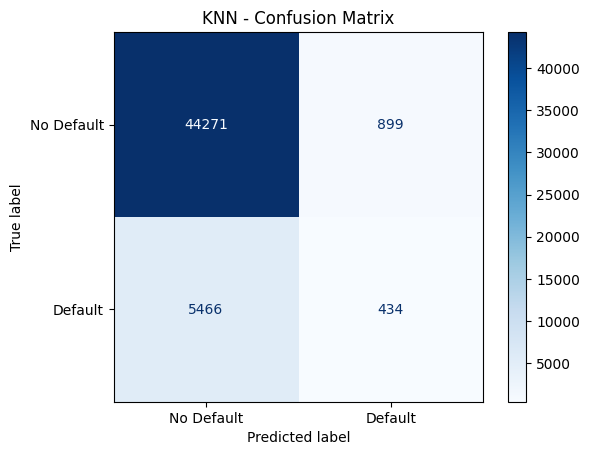

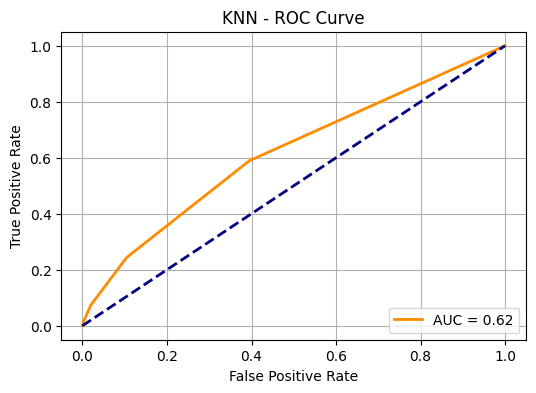

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     45170
           1       0.33      0.07      0.12      5900

    accuracy                           0.88     51070
   macro avg       0.61      0.53      0.53     51070
weighted avg       0.82      0.88      0.84     51070

Training Accuracy: 89.48%
Testing Accuracy: 87.54%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
disp.plot(cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.show()

# 2. ROC Curve
# Get probability estimates for positive class
y_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 3. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Training Accuracy: {training_accuracy:.2f}%")
print(f"Testing Accuracy: {testing_accuracy:.2f}%")


3-Random Forest trial(lowest accuracy obtained)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
# Step 1: Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Step 2: Preprocess the data
# Example preprocessing (modify based on dataset specifics)
X = train_data.drop(columns=['LoanID', 'Default'])
y = train_data['Default']
X_test = test_data.drop(columns=['LoanID'])

# Handle missing values for numerical and categorical features separately
# Get numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Impute missing values for numerical columns with median
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X[numerical_cols].median())

# Impute missing values for categorical columns with mode (most frequent)
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])  # Get the first mode if multiple modes exist
    X_test[col] = X_test[col].fillna(X[col].mode()[0])


# Encode categorical variables
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Step 3: Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Validate the model
y_val_pred = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation ROC AUC: {roc_auc}")
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_val, y_val)  )

# Step 6: Generate predictions
y_test_pred = model.predict_proba(X_test)[:, 1]

# Step 7: Prepare the submission
prediction_df = pd.DataFrame({
    'LoanID': test_data['LoanID'],
    'predicted_probability': y_test_pred
})

# Step 8: Save the submission
prediction_df.to_csv('submission.csv', index=False)

Validation ROC AUC: 0.7352409879063275
Training Accuracy: 0.9999657328039867
Testing Accuracy: 0.886547875465048


4-Gradient Boosting
5- Multilayer Perceptron

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

# Fix: Removed 'Default' from numerical_cols and corrected 'EmployementType' to 'EmploymentType'
categorical_cols = ['LoanID', 'EmploymentType', 'MaritalStatus', 'Education',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Target & features
X = train_df.drop(columns=['Default'])  # 'Default' is the target, not a feature
y = train_df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define and train
from sklearn.ensemble import GradientBoostingClassifier # Import the GradientBoostingClassifier

mlp_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])


gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Fit both models
# Fit the model
mlp_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Income',
                                                   'LoanAmount', 'CreditScore',
                                                   'MonthsEmployed',
                                                   'NumCreditLines',
                                                   'InterestRate', 'LoanTerm',
                                                   'DTIRatio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['LoanID', 'EmploymentType',
                                                   'MaritalStatus', 'Education',
                                                   'HasMortgage',
                                                   'HasDependents',
                                                   'LoanPurpose',
                                                   'HasCoSigner'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:
def evaluate_model(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    print(f"🔹 {label} Evaluation")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.2f}")
    print()

    return {
        'Model': label,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

results = []
results.append(evaluate_model(mlp_model, X_test, y_test, "MLP Classifier"))
results.append(evaluate_model(gb_model, X_test, y_test, "Gradient Boosting"))


🔹 MLP Classifier Evaluation
Accuracy : 0.88
Precision: 0.49
Recall   : 0.10
F1 Score : 0.16

🔹 Gradient Boosting Evaluation
Accuracy : 0.89
Precision: 0.66
Recall   : 0.05
F1 Score : 0.10



<ipython-input-43-f2d79c62707c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(results), x='Model', y=metric, palette='coolwarm')


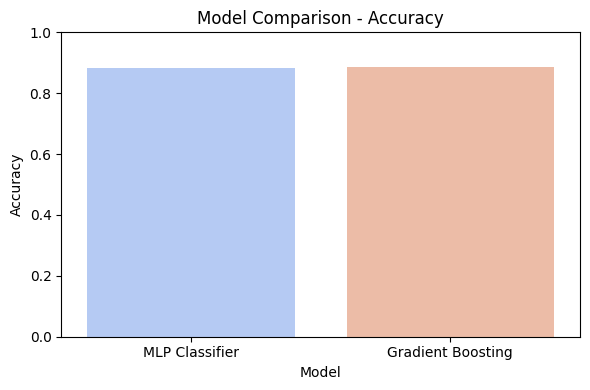

<ipython-input-43-f2d79c62707c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(results), x='Model', y=metric, palette='coolwarm')


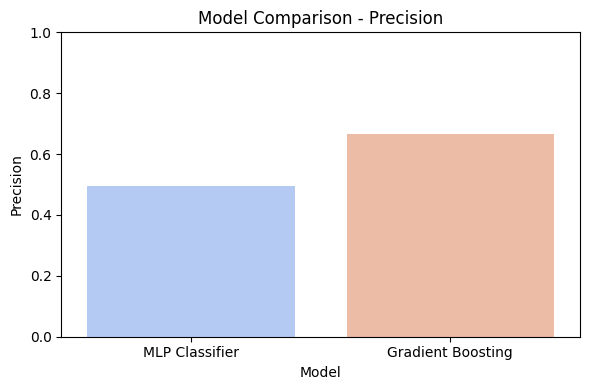

<ipython-input-43-f2d79c62707c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(results), x='Model', y=metric, palette='coolwarm')


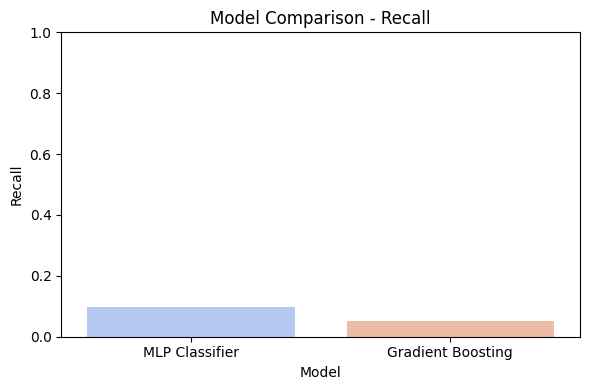

<ipython-input-43-f2d79c62707c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(results), x='Model', y=metric, palette='coolwarm')


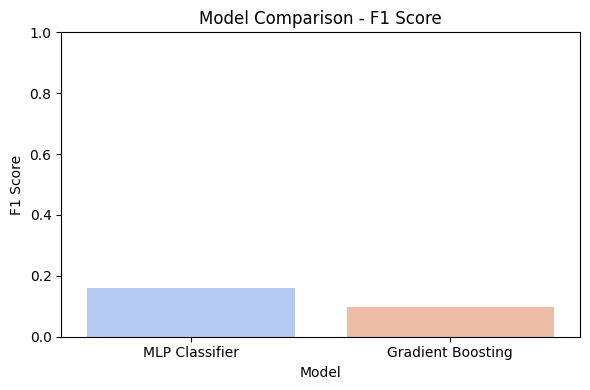

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=pd.DataFrame(results), x='Model', y=metric, palette='coolwarm')
    plt.title(f'Model Comparison - {metric}')
    plt.ylim(0, 1)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()



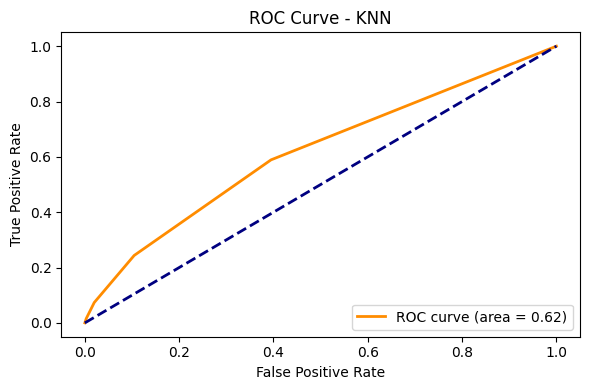

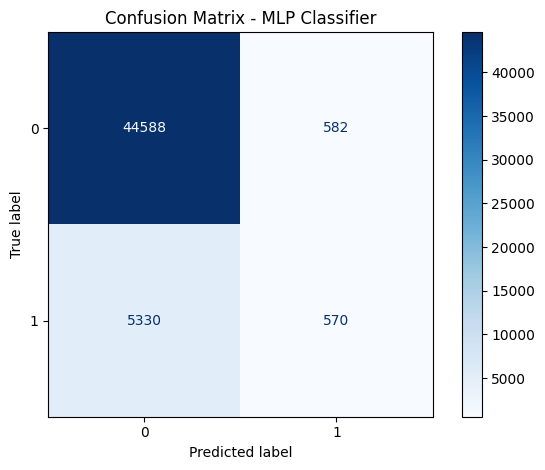

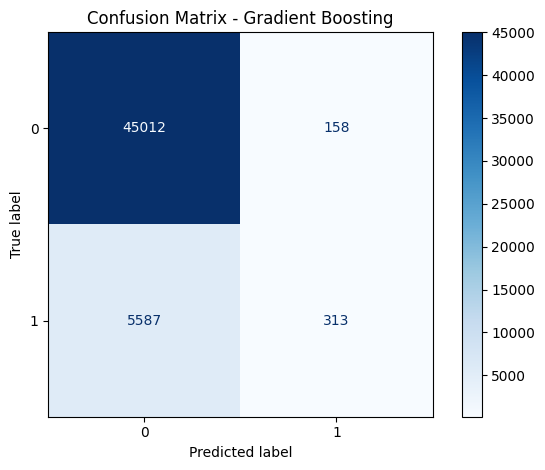

<ipython-input-54-50f39be36254>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df, x='Model', y=metric, palette='viridis')


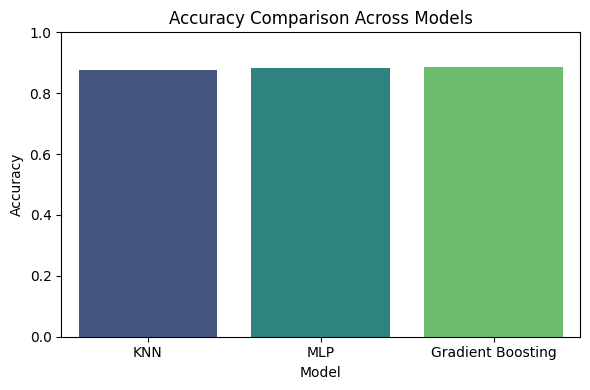

<ipython-input-54-50f39be36254>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df, x='Model', y=metric, palette='viridis')


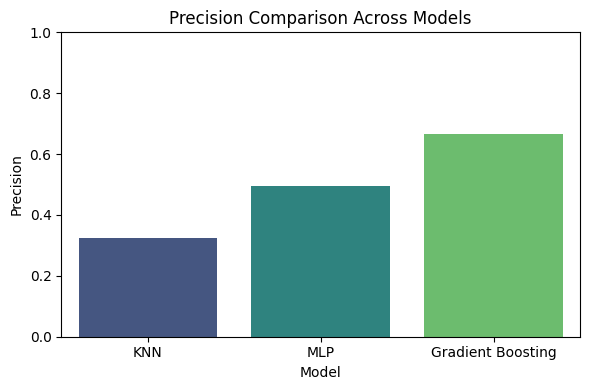

<ipython-input-54-50f39be36254>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df, x='Model', y=metric, palette='viridis')


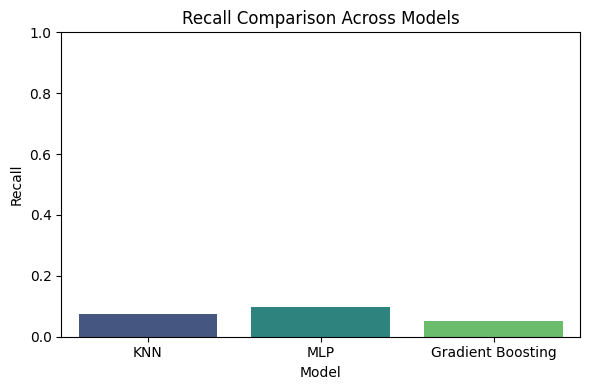

<ipython-input-54-50f39be36254>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df, x='Model', y=metric, palette='viridis')


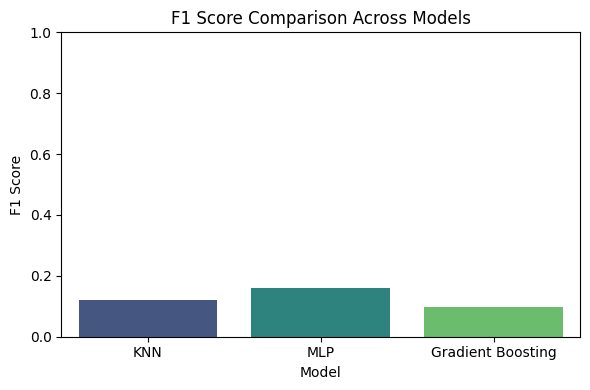

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===== ROC Curve for KNN =====
y_prob_knn = kn_n.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ===== Confusion Matrix for MLP and Gradient Boosting =====
models = {'MLP Classifier': mlp_model, 'Gradient Boosting': gb_model}

for name, model in models.items():
    # Fix: Include 'LoanID' in X_test for prediction
    X_test_with_loanid = train_df.loc[X_test.index]  # Get the rows from train_df using X_test index
    y_pred = model.predict(X_test_with_loanid)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

# ===== Metrics Visualization for All Models =====
all_models = [
    ('KNN', kn_n),
    ('MLP', mlp_model),
    ('Gradient Boosting', gb_model)
]

results = []

for name, model in all_models:
    # Fix: Include 'LoanID' in X_test for prediction
    X_test_with_loanid = train_df.loc[X_test.index] # Get the rows from train_df using X_test index
    y_pred = model.predict(X_test_with_loanid)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })


result_df = pd.DataFrame(results)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=result_df, x='Model', y=metric, palette='viridis')
    plt.title(f'{metric} Comparison Across Models')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


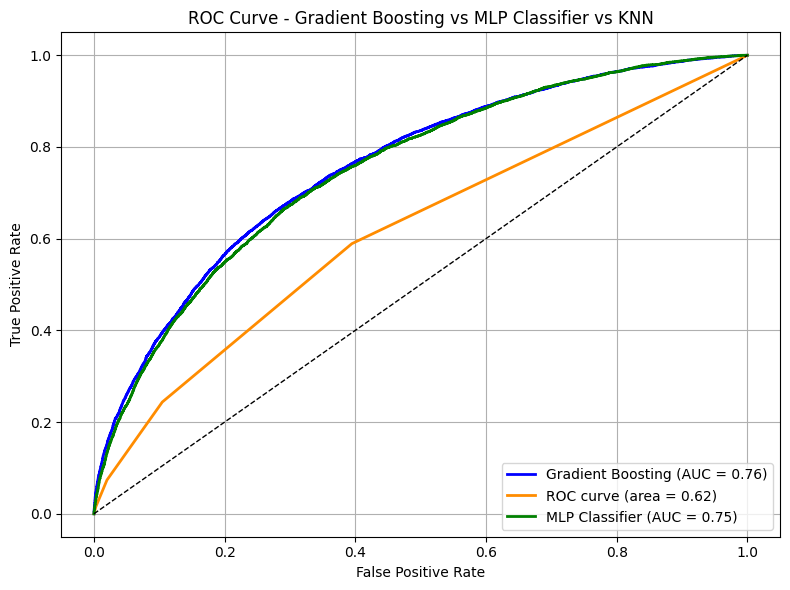

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
X_test_with_loanid = train_df.loc[X_test.index]  # Get the rows from train_df using X_test index
y_prob_gb = gb_model.predict_proba(X_test_with_loanid)[:, 1]

# Similarly, include 'LoanID' for MLP prediction
y_prob_mlp = mlp_model.predict_proba(X_test_with_loanid)[:, 1]
y_prob_knn = kn_n.predict_proba(X_test)[:, 1]


# Compute ROC curve and AUC for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Compute ROC curve and AUC for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

y_prob_knn = kn_n.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)


# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label=f'MLP Classifier (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting vs MLP Classifier vs KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

